In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import bs4
import requests
from bs4 import BeautifulSoup
from PIL import Image
import io
import re

In [4]:
r = requests.get('https://pokemondb.net/pokedex/national')
r.text[:200]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>List of Pokémon (sprites gallery) | Pokémon Database</title>\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link rel="p'

In [5]:
s = BeautifulSoup(r.text, 'lxml')
    

In [6]:
sc = s.find_all('div' , {'class':'infocard'})


In [7]:
sc[5]

<div class="infocard"><span class="infocard-lg-img"><a href="/pokedex/charizard"><span class="img-fixed img-sprite" data-alt="Charizard sprite" data-src="https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charizard.png"></span></a></span><span class="infocard-lg-data text-muted"><small>#006</small><br/> <a class="ent-name" href="/pokedex/charizard">Charizard</a><br/> <small><a class="itype fire" href="/type/fire">Fire</a> · <a class="itype flying" href="/type/flying">Flying</a></small></span></div>

In [8]:
sc[10].find('span',{'class':'img-fixed img-sprite'})['data-alt']

'Metapod sprite'

In [9]:
sc[0].find('span',{'class':'img-fixed img-sprite'})['data-src']

'https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/bulbasaur.png'

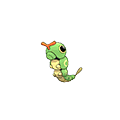

In [10]:
r1 = requests.get(sc[9].find('span',{'class':'img-fixed img-sprite'})['data-src'])
img = Image.open(io.BytesIO(r1.content))
img

In [11]:
def save_img(imgfilename : str,content):
    with open (imgfilename, 'wb') as f:
        f.write(content)

In [14]:

for e in sc[:6]:
    img_url = e.find('span',{'class':'img-fixed img-sprite'})['data-src']
    img_name = e.find('span',{'class':'img-fixed img-sprite'})['data-alt']
    r = requests.get(img_url)
    save_img(f'{img_name}.jpg' , r.content)

    
    
    

In [15]:
sc[0].find('a')['href']

'/pokedex/bulbasaur'

In [20]:
url_prefix = 'https://pokemondb.net'
rows = []
for e in sc:
    url_img = e.find('span',{'class':'img-fixed img-sprite'})['data-src']
    img_name = e.find('span',{'class':'img-fixed img-sprite'})['data-alt']
    img_html = f'<img src="{url_img}" />'
    link_url = url_prefix + e.find('a')['href']
    href_html = f'<a href ="{link_url}">{img_name}</a>'
    rows.append((img_name,link_url,url_img,img_html,href_html))
    

    

In [38]:
df = pd.DataFrame(rows,columns=['name','link','url_img','img_html','link_html'])

In [39]:
pd.set_option('display.max_colwidth',-1)
df[:9]

<ipython-input-39-36eed094942d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,name,link,url_img,img_html,link_html
0,Bulbasaur sprite,https://pokemondb.net/pokedex/bulbasaur,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/bulbasaur.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/bulbasaur.png"" />","<a href =""https://pokemondb.net/pokedex/bulbasaur"">Bulbasaur sprite</a>"
1,Ivysaur sprite,https://pokemondb.net/pokedex/ivysaur,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/ivysaur.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/ivysaur.png"" />","<a href =""https://pokemondb.net/pokedex/ivysaur"">Ivysaur sprite</a>"
2,Venusaur sprite,https://pokemondb.net/pokedex/venusaur,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/venusaur.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/venusaur.png"" />","<a href =""https://pokemondb.net/pokedex/venusaur"">Venusaur sprite</a>"
3,Charmander sprite,https://pokemondb.net/pokedex/charmander,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charmander.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charmander.png"" />","<a href =""https://pokemondb.net/pokedex/charmander"">Charmander sprite</a>"
4,Charmeleon sprite,https://pokemondb.net/pokedex/charmeleon,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charmeleon.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charmeleon.png"" />","<a href =""https://pokemondb.net/pokedex/charmeleon"">Charmeleon sprite</a>"
5,Charizard sprite,https://pokemondb.net/pokedex/charizard,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charizard.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/charizard.png"" />","<a href =""https://pokemondb.net/pokedex/charizard"">Charizard sprite</a>"
6,Squirtle sprite,https://pokemondb.net/pokedex/squirtle,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/squirtle.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/squirtle.png"" />","<a href =""https://pokemondb.net/pokedex/squirtle"">Squirtle sprite</a>"
7,Wartortle sprite,https://pokemondb.net/pokedex/wartortle,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/wartortle.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/wartortle.png"" />","<a href =""https://pokemondb.net/pokedex/wartortle"">Wartortle sprite</a>"
8,Blastoise sprite,https://pokemondb.net/pokedex/blastoise,https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/blastoise.png,"<img src=""https://img.pokemondb.net/sprites/omega-ruby-alpha-sapphire/dex/normal/blastoise.png"" />","<a href =""https://pokemondb.net/pokedex/blastoise"">Blastoise sprite</a>"


In [40]:
from IPython.display import HTML

In [44]:
HTML(df[['img_html','link_html']].to_html(escape=False))

,img_html,link_html
0,,Bulbasaur sprite
1,,Ivysaur sprite
2,,Venusaur sprite
3,,Charmander sprite
4,,Charmeleon sprite
5,,Charizard sprite
6,,Squirtle sprite
7,,Wartortle sprite
8,,Blastoise sprite
9,,Caterpie sprite


In [42]:
df.to_csv('pokemon.csv',index=False)